In [159]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [160]:
dataset = pandas.read_csv(r"C:\Users\OmarioVIC\Desktop\Machine Learning\Datasets\churn_modeling.csv")
test_ds =  pandas.read_csv(r"C:\Users\OmarioVIC\Desktop\Machine Learning\Datasets\churn_modeling_test_hidden.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9800,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9801,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9802,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9804 non-null   int64  
 1   CustomerId       9804 non-null   int64  
 2   Surname          9804 non-null   object 
 3   CreditScore      9804 non-null   int64  
 4   Geography        9804 non-null   object 
 5   Gender           9804 non-null   object 
 6   Age              9804 non-null   int64  
 7   Tenure           9804 non-null   int64  
 8   Balance          9804 non-null   float64
 9   NumOfProducts    9804 non-null   int64  
 10  HasCrCard        9804 non-null   int64  
 11  IsActiveMember   9804 non-null   int64  
 12  EstimatedSalary  9804 non-null   float64
 13  Exited           9804 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


In [162]:
data = dataset.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis = 1)
test = test_ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
target = dataset["Exited"]

In [163]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [164]:
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

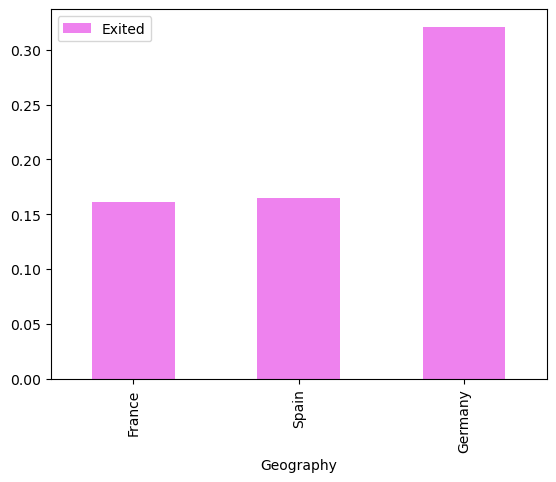

In [165]:
dic = pandas.concat([data['Geography'], target], axis = 1).groupby('Geography').mean().sort_values(by = 'Exited')
dic.plot(kind = 'bar', color = 'violet')
plt.show()

In [166]:
data['Geography'] = data['Geography'].map({'France':1, 'Spain':1, 'Germany':2})
test['Geography'] = test['Geography'].map({'France':1, 'Spain':1, 'Germany':2})

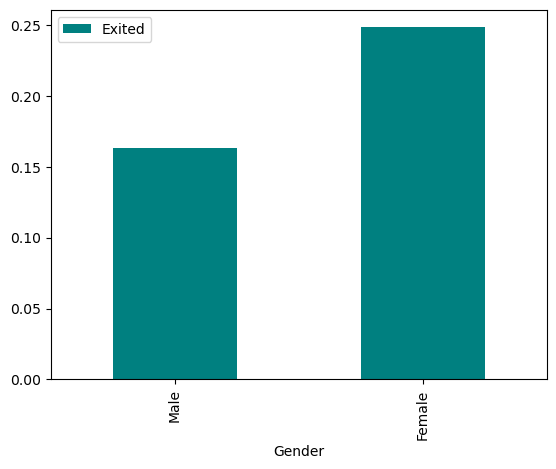

In [167]:
dic = pandas.concat([data['Gender'],target], axis = 1).groupby('Gender').mean().sort_values(by = 'Exited')
dic.plot(kind = 'bar', color = 'teal')
plt.show()

In [168]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':2})
test['Gender'] = test['Gender'].map({'Male':1, 'Female':2})

In [169]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,42,2,0.00,1,1,1,101348.88
1,608,1,2,41,1,83807.86,1,0,1,112542.58
2,502,1,2,42,8,159660.80,3,1,0,113931.57
3,699,1,2,39,1,0.00,2,0,0,93826.63
4,850,1,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9799,771,1,1,39,5,0.00,2,1,0,96270.64
9800,516,1,1,35,10,57369.61,1,1,1,101699.77
9801,709,1,2,36,7,0.00,1,0,1,42085.58
9802,772,2,1,42,3,75075.31,2,1,0,92888.52


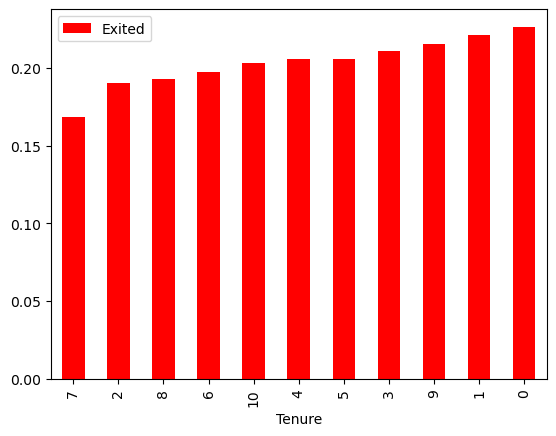

In [170]:
dic = pandas.concat([data['Tenure'],target], axis = 1).groupby('Tenure').mean().sort_values(by = 'Exited')
dic.plot(kind = 'bar', color = 'red')
plt.show()

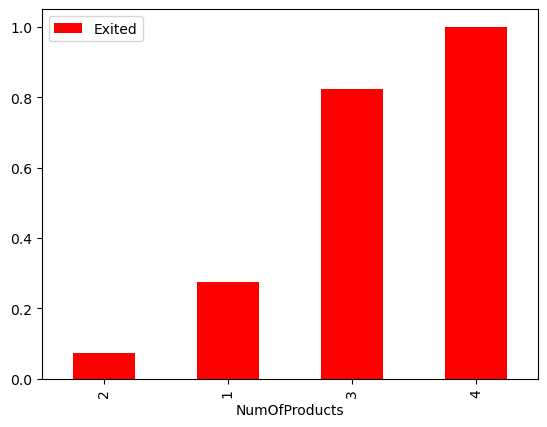

In [171]:
dic = pandas.concat([data['NumOfProducts'],target], axis = 1).groupby('NumOfProducts').mean().sort_values(by = 'Exited')
dic.plot(kind = 'bar', color = 'red')
plt.show()

In [172]:
data['NumOfProducts'] = data['NumOfProducts'].map({2:1, 1:2, 3:3, 4:4})
test['NumOfProducts'] = test['NumOfProducts'].map({2:1, 1:2, 3:3, 4:4})

In [173]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,42,2,0.00,2,1,1,101348.88
1,608,1,2,41,1,83807.86,2,0,1,112542.58
2,502,1,2,42,8,159660.80,3,1,0,113931.57
3,699,1,2,39,1,0.00,1,0,0,93826.63
4,850,1,2,43,2,125510.82,2,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9799,771,1,1,39,5,0.00,1,1,0,96270.64
9800,516,1,1,35,10,57369.61,2,1,1,101699.77
9801,709,1,2,36,7,0.00,2,0,1,42085.58
9802,772,2,1,42,3,75075.31,1,1,0,92888.52


In [174]:
data_scaled = StandardScaler().fit_transform(data)
test_scaled = StandardScaler().fit_transform(test)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = 0.1)

In [176]:
model = BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [177]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

0.5806451612903226

In [178]:
predictions = model.predict(test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [179]:
submission = pandas.DataFrame({
        "PassengerId": test_ds["CustomerId"],
        "Survived": predictions
    })

In [180]:
submission.to_csv('submission.csv', index = False)

In [181]:
submission

,PassengerId,Survived
0,15664772,0
1,15576683,0
2,15682563,0
3,15650889,0
4,15612108,0
...,...,...
191,15585985,1
192,15699257,0
193,15804104,0
194,15727619,1
